In [44]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")

# from matplotlib.pyplot import figure
# # figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# figure(num=None, figsize=(8, 6))

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10


In [3]:
import pandas as pd

alco = pd.read_csv("alco2009.csv").fillna(method='ffill').reset_index().set_index(['State','Year']).drop(['index'], axis=1)


In [5]:
columns, years = alco.unstack().columns.levels
columns, years

(Index(['Beer', 'Wine', 'Spirits'], dtype='object'),
 Int64Index([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
             1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
             1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
            dtype='int64', name='Year'))

In [7]:
# alco.unstack().columns.levels
alco.columns

Index(['Beer', 'Wine', 'Spirits'], dtype='object')

In [9]:
alco.head()

Beer  Wine  Spirits
State   Year                     
Alabama 2009  1.20  0.22     0.58
        2008  1.24  0.22     0.58
        2007  1.24  0.22     0.56
        2006  1.22  0.21     0.55
        2005  1.18  0.20     0.53

In [10]:
alco.unstack().head()

Beer                                                        ...   \
Year        1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  ...    
State                                                                   ...    
Alabama     0.99  0.98  0.98  0.96  1.00  1.00  1.01  1.02  1.06  1.09  ...    
Alaska      1.19  1.39  1.50  1.55  1.71  1.75  1.76  1.73  1.68  1.68  ...    
Arizona     1.70  1.77  1.86  1.69  1.78  1.74  1.62  1.57  1.67  1.77  ...    
Arkansas    0.92  0.97  0.93  1.00  1.06  1.03  1.03  1.02  1.03  1.06  ...    
California  1.31  1.36  1.42  1.42  1.43  1.37  1.37  1.38  1.32  1.36  ...    

           Spirits                                                        
Year          2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  
State                                                                     
Alabama       0.51  0.53  0.53  0.52  0.52  0.53  0.55  0.56  0.58  0.58  
Alaska        0.92  0.97  1.08  0.79  0.96  0.99  1.02  1.07  1.09  1.16  
Arizona       0.71  0.70  0.69  0.71  0.70  0.74  0.78  0.76  0.75  0.74  
Arkansas      0.53  0.53  0.53  0.56  0.58  0.58  0.59  0.60  0.60  0.60  
California    0.64  0.64  0.63  0.65  0.67  0.68  0.70  0.72  0.72  0.73  

[5 rows x 99 columns]

In [21]:
states = pd.read_csv( "states.csv", names=("State", "Standard", "Postal", "Capital")) 
states.set_index("State", inplace=True)

In [23]:
states.head()

,Standard,Postal,Capital
State,,,
State,Standard,Postal,Capital
Alabama,Ala.,AL,Montgomery
Alaska,Alaska,AK,Juneau
Arizona,Ariz.,AZ,Phoenix
Arkansas,Ark.,AR,Little Rock


In [24]:
# Alcohol consumption will be sorted by year 2009
frames = [pd.merge(alco[column].unstack(), states,
                   left_index=True, right_index=True).sort_values(2009)
for column in columns] # How many years are covered?
span = max(years) - min(years) + 1

In [32]:
type(frames[0])

pandas.core.frame.DataFrame

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


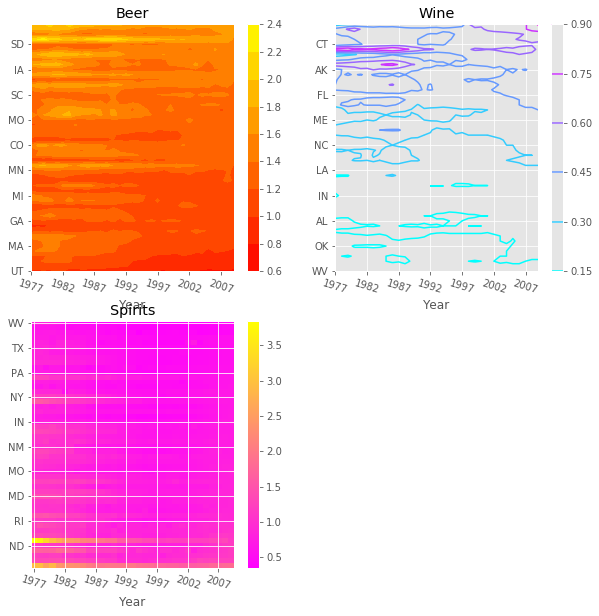

In [45]:
# Select a good-looking style
matplotlib.style.use("ggplot")
STEP = 5
    # Plot each frame in a subplot
for pos, (draw, style, column, frame) in enumerate(zip(
            (plt.contourf, plt.contour, plt.imshow),
            (plt.cm.autumn, plt.cm.cool, plt.cm.spring),
            columns, 
            frames
        )
    ):
        # Select the subplot with 2 rows and 2 columns
    plt.subplot(2, 2, pos + 1) # Plot the frame
    draw(frame[frame.columns[:span]], cmap=style, aspect="auto")
            # Add embellishments
    plt.colorbar() 
    plt.title(column)
    plt.xlabel("Year")
    plt.xticks(range(0, span, STEP), frame.columns[:span:STEP]) 
    plt.yticks(range(0, frame.shape[0], STEP), frame.Postal[::STEP]) 
    plt.xticks(rotation=-17)

In [37]:
plt.tight_layout() 
# plt.savefig("../images/pyplot-all.pdf") 
#plt.show()

<Figure size 432x288 with 0 Axes>

## Mastering Embellishments

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


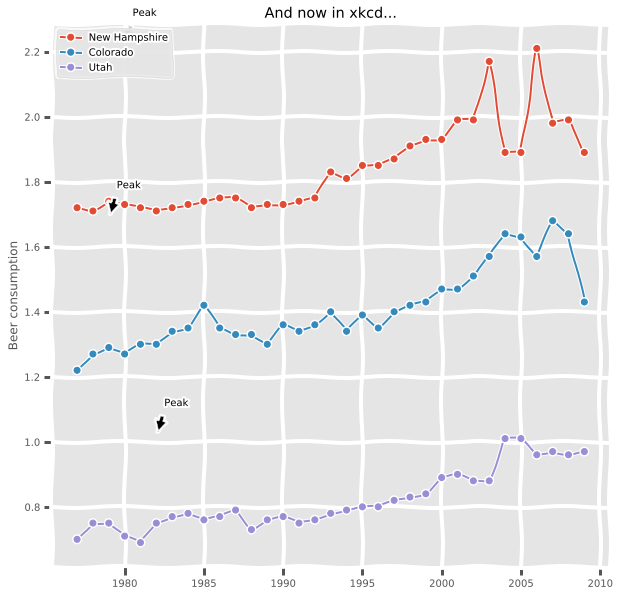

In [48]:
import matplotlib, matplotlib.pyplot as plt 
import pickle, pandas as pd
# The NIAAA frame has been pickled before
# alco = pickle.load(open("alco.pickle", "rb"))

# Select the right data
BEVERAGE = "Beer"
years = alco.index.levels[1]
states = ("New Hampshire", "Colorado", "Utah")

# Select a good-looking style
plt.xkcd() 
matplotlib.style.use("ggplot")

# Plot the charts
for state in states:
    ydata = alco.ix[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    # Add annotations with arrows
    plt.annotate(s="Peak", xy=(ydata.argmax(), ydata.max()), 
                 xytext=(ydata.argmax() + 0.5, ydata.max() + 0.1), 
                 arrowprops={"facecolor": "black", "shrink": 0.2})

    # Add labels and legends
plt.ylabel(BEVERAGE + " consumption") 
plt.title("And now in xkcd...") 
plt.legend(states)

# plt.savefig("../images/pyplot-legend-xkcd.pdf")

## Plottings with Pandas

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


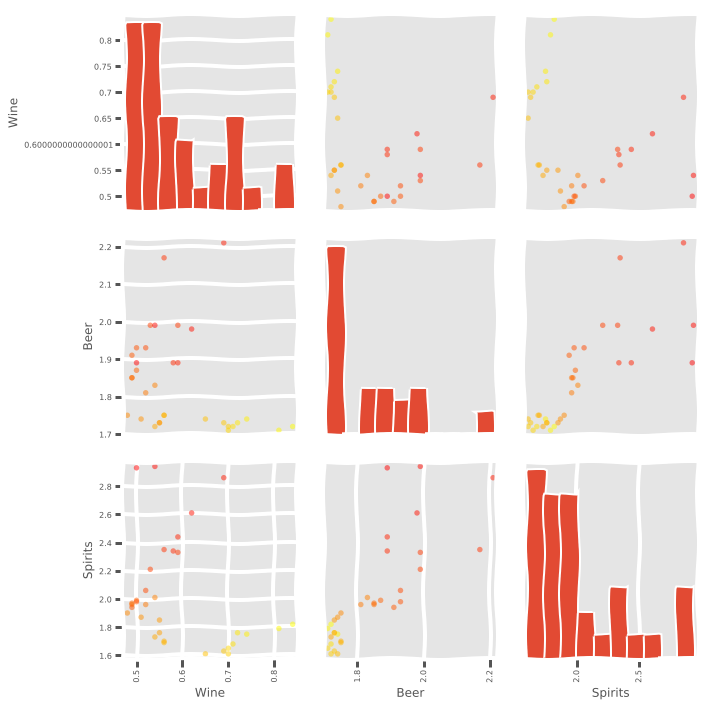

In [50]:
from pandas.tools.plotting import scatter_matrix 
import matplotlib, matplotlib.pyplot as plt 
import pickle, pandas as pd

# The NIAAA frame has been pickled before
# alco = pickle.load(open("alco.pickle", "rb")) # Select a good-locking style
matplotlib.style.use("ggplot")

# Plot the scatter matrix
STATE = "New Hampshire"
statedata = alco.ix[STATE].reset_index() 
scatter_matrix(statedata[["Wine", "Beer", "Spirits"]], 
               s=120, c=statedata["Year"], cmap=plt.cm.autumn)
plt.tight_layout() 
# plt.savefig("../images/scatter-matrix.pdf")